This is a DEMO for loading a pre-trained eqpolarity models from both California and Texas

Make sure eqpolarity is installed following the instructions on the main website
https://github.com/chenyk1990/eqpolarity

In [1]:
## Import data
#polall is polarity label from Texas (Size: 22980x1)
#datall is 600-sample waveform data (Z-component) from Texas (Size: 22980 x 600 x 1); the waveform is centered by P-arrival (manual from Texas analysts) sample

import numpy as np

# datall_Texas.npy can also be downloaded from https://mega.nz/file/chxx1Z5Y#zXNRKT5aeNy7AGREKEUIq71TREK8hcUyXA1ZOkQ9DlM
# datall = np.load('../data/TexasData/datall_Texas.npy') 
polall = np.load('../data/TexasData/polall_Texas.npy')

data=[]
for ii in range(6):
    data.append(np.load('../data/TexasData/datall_Texas%d.npy'%(ii+1)))
datall=np.concatenate(data,axis=0)


In [2]:
## Load EQpolarity model
from eqpolarity.utils import construct_model
input_shape = (600,1)
model=construct_model(input_shape)
model.summary()

2024-08-09 22:26:18.464359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 600, 1)]             0         []                            
                                                                                                  
 cct_tokenizer1 (CCTTokeniz  (None, 150, 200)             160800    ['input[0][0]']               
 er1)                                                                                             
                                                                                                  
 layer_normalization (Layer  (None, 150, 200)             400       ['cct_tokenizer1[0][0]']      
 Normalization)                                                                                   
                                                                                              

In [3]:
## Load pre-trained model for prediction
model.load_weights('../models/best_weigths_Binary_SCSN_Best.h5')
out = model.predict(datall,batch_size=1024, verbose=1)

23/23 [==============================] - 318s 14s/step


In [4]:
## Applying threshold
#outtest = np.argmax(out,axis=-1)
thre = 0.5
outtest = out
outtest[outtest<thre]=0
outtest[outtest>=thre]=1
labtest = polall

## Calculating accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(labtest,outtest),precision_score(labtest,outtest, average='micro'),recall_score(labtest,outtest, average='micro'),f1_score(labtest,outtest, average='micro')

(0.9459094865100087,
 0.9459094865100087,
 0.9459094865100087,
 0.9459094865100087)

In [5]:
accuracy_score(labtest,outtest),precision_score(labtest,outtest, average=None),recall_score(labtest,outtest, average=None),f1_score(labtest,outtest, average=None)

(0.9459094865100087,
 array([0.97869277, 0.89579665]),
 array([0.93488276, 0.96491644]),
 array([0.95628627, 0.92907275]))

In [6]:
#Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(labtest, outtest)
print(cf_matrix)

[[13596   947]
 [  296  8141]]


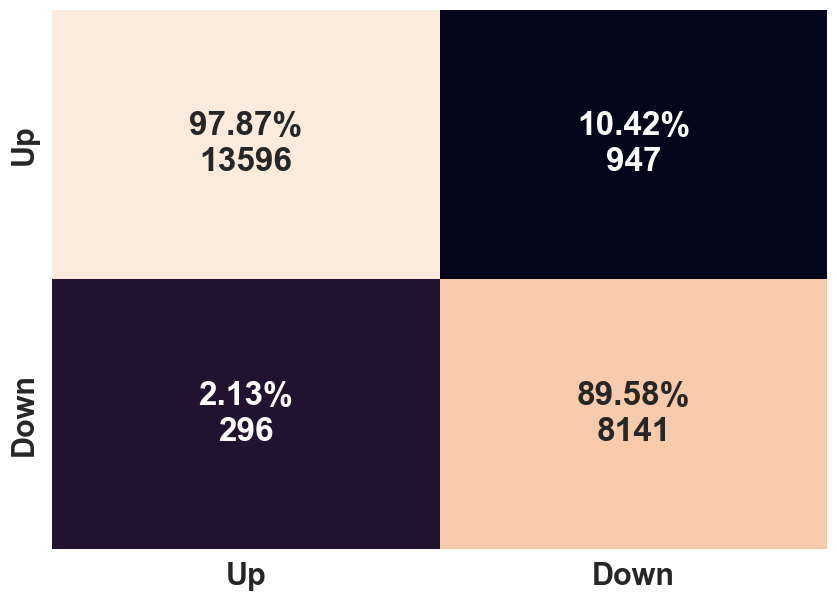

In [7]:
## plotting confusion matrix
from eqpolarity import plot_confusionmatrix
plot_confusionmatrix(cf=cf_matrix,categories=['Up','Down'],figname='Conf_Matrix_before_transferlearning.png',ifshow=True)

In [8]:
model.load_weights("../models/best_weigths_Binary_Texas_Transfer10.h5")
out = model.predict(datall,batch_size=1024, verbose=1)

23/23 [==============================] - 317s 14s/step


In [9]:
#outtest = np.argmax(out,axis=-1)
thre = 0.5
outtest = out
outtest[outtest<thre]=0
outtest[outtest>=thre]=1
labtest = polall

In [10]:
## plotting different types of accuracy
accuracy_score(labtest,outtest),precision_score(labtest,outtest, average='micro'),recall_score(labtest,outtest, average='micro'),f1_score(labtest,outtest, average='micro')

(0.9857267188859878,
 0.9857267188859878,
 0.9857267188859878,
 0.9857267188859878)

In [11]:
accuracy_score(labtest,outtest),precision_score(labtest,outtest, average=None),recall_score(labtest,outtest, average=None),f1_score(labtest,outtest, average=None)

(0.9857267188859878,
 array([0.98912669, 0.97987928]),
 array([0.98831053, 0.98127296]),
 array([0.98871844, 0.98057562]))

In [12]:
accuracy_score(labtest,outtest),precision_score(labtest,outtest, average='macro'),recall_score(labtest,outtest, average='macro'),f1_score(labtest,outtest, average='macro')

(0.9857267188859878,
 0.9845029851533673,
 0.9847917458626554,
 0.9846470336863404)

In [13]:
cf_matrix = confusion_matrix(labtest, outtest)
print(cf_matrix)



[[14373   170]
 [  158  8279]]


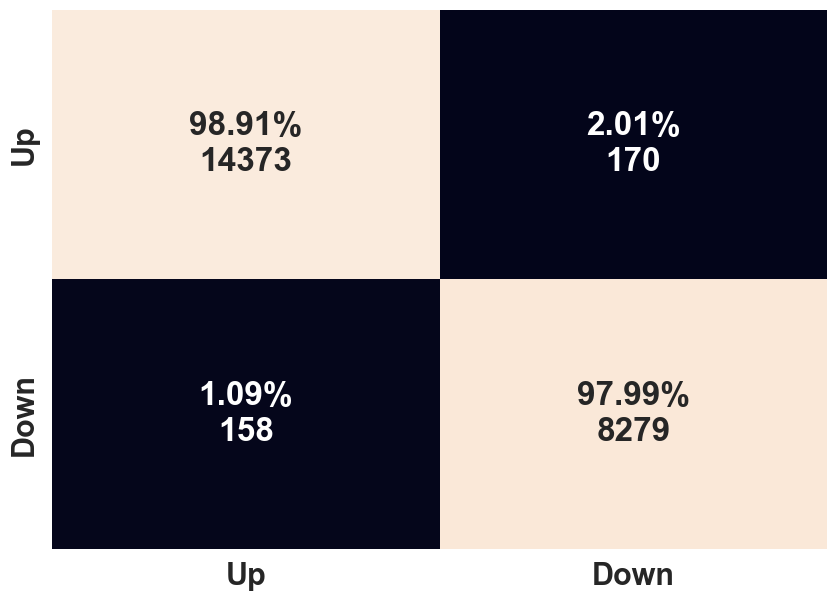

In [14]:
## plot confusion matrix
from eqpolarity import plot_confusionmatrix
plot_confusionmatrix(cf=cf_matrix,categories=['Up','Down'],figname='Conf_Matrix_after_transferlearning.png',ifshow=True)